In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)


ride_data_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset

merge_data_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')


# Display the data table for preview
merge_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

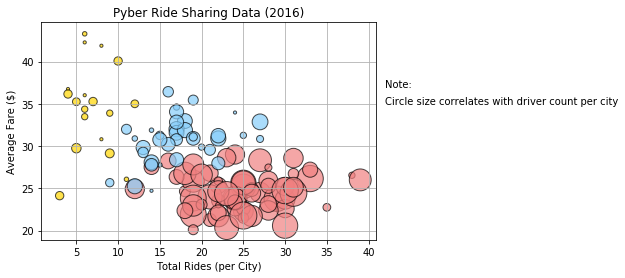

In [12]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure
# Show plot

groupcity=merge_data_df.groupby("city")
Avg_Fare=groupcity["fare"].mean()

Total_Rides=merge_data_df["city"].value_counts()

Clean_Drivers=merge_data_df.drop_duplicates(subset="city")

Driversdf=pd.DataFrame(Clean_Drivers)
Driversdf=Driversdf.set_index("city")
TotalDrivers=Driversdf["driver_count"]

City_Type=Driversdf["type"]


scatter_dict={"Total Rides per City":Total_Rides,
      "Average Fare per City":Avg_Fare,
       "Total Number of Drivers Per City":TotalDrivers,
       "City Type":City_Type}

scatter_df=pd.DataFrame(scatter_dict)

Urban_df = scatter_df.loc[scatter_df["City Type"] == "Urban"]
Rural_df = scatter_df.loc[scatter_df["City Type"] == "Rural"]
Suburban_df = scatter_df.loc[scatter_df["City Type"] == "Suburban"]


Urban_ride_data = Urban_df["Total Rides per City"]
Rural_ride_data = Rural_df["Total Rides per City"]
Suburban_ride_data = Suburban_df["Total Rides per City"]

Urban_fare_data = Urban_df["Average Fare per City"]
Rural_fare_data = Rural_df["Average Fare per City"]
Suburban_fare_data = Suburban_df["Average Fare per City"]

Urban_driver_data = Urban_df["Total Number of Drivers Per City"]
Rural_driver_data = Rural_df["Total Number of Drivers Per City"]
Suburban_driver_data = Suburban_df["Total Number of Drivers Per City"]


Urban_plot=plt.scatter(Urban_ride_data, Urban_fare_data, s=Urban_driver_data*10, marker="o", 
                       facecolors="lightcoral",edgecolors="black",  alpha=.7, label="Urban")

Suburban_plot=plt.scatter(Suburban_ride_data, Suburban_fare_data, s=Suburban_driver_data*10, marker="o", 
                          facecolors="lightskyblue", edgecolors="black", alpha=.7, label="Suburban")

Rural_plot=plt.scatter(Rural_ride_data, Rural_fare_data, s=Rural_driver_data*10,marker="o", 
                       facecolors="gold",edgecolors="black", alpha=.7, label="Rural")

plt.ylim(20,40)
plt.xlim(5,40)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides (per City)")
plt.ylabel("Average Fare ($)")

plt.grid()

plt.axis('auto')

plt.text(42, 37, "Note:")
plt.text(42, 35 ,"Circle size correlates with driver count per city")

plt.savefig("data/Ali-scatter-plots-share.png")

plt.show()


## Total Fares by City Type

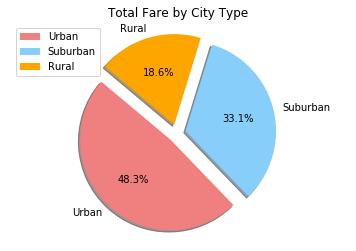

In [18]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure

# Show Figure

Total_Fares=scatter_df["Average Fare per City"].sum()
Total_Fares

Urban_Total_Fares=Urban_df["Average Fare per City"].sum()
Suburban_Total_Fares=Suburban_df["Average Fare per City"].sum()
Rural_Total_Fares=Rural_df["Average Fare per City"].sum()

percent_urban=(Urban_Total_Fares/Total_Fares)*100
percent_suburban=(Suburban_Total_Fares/Total_Fares)*100
percent_rural=(Rural_Total_Fares/Total_Fares)*100


percent_fares={"Total Urban Fare Percent":percent_urban,
              "Total Suburban Fare Percent": percent_suburban,
              "Total Rural Fare Percent": percent_rural}

labels = ["Urban", "Suburban", "Rural"]


sizes = [percent_urban, percent_suburban, percent_rural]


colors = ["lightcoral", "lightskyblue", "orange"]

explode = (0.1, 0.1, 0.1)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Total Fare by City Type")
plt.legend()

plt.savefig("data/ali-pie-chart-for-total.png")


plt.show()

## Total Rides by City Type

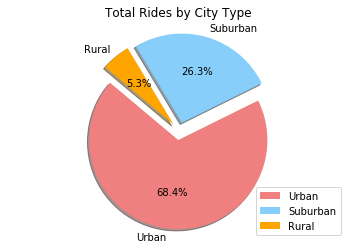

In [17]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

# Show Figure

Total_Rides=scatter_df["Total Rides per City"].sum()


Urban_Total_Rides=Urban_df["Total Rides per City"].sum()
Suburban_Total_Rides=Suburban_df["Total Rides per City"].sum()
Rural_Total_Rides=Rural_df["Total Rides per City"].sum()

Rpercent_urban=(Urban_Total_Rides/Total_Rides)*100
Rpercent_suburban=(Suburban_Total_Rides/Total_Rides)*100
Rpercent_rural=(Rural_Total_Rides/Total_Rides)*100


percent_fares={"Total Urban Ride Percent":Rpercent_urban,
              "Total Suburban Ride Percent": Rpercent_suburban,
              "Total Rural Ride Percent": Rpercent_rural}

labels = ["Urban", "Suburban", "Rural"]


sizes = [Rpercent_urban, Rpercent_suburban, Rpercent_rural]


colors = ["lightcoral", "lightskyblue", "orange"]

explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Total Rides by City Type")
plt.legend(loc=4)

plt.savefig("data/ali-pie-chart-for-total-rides-per-city.png")


plt.show()

## Total Drivers by City Type

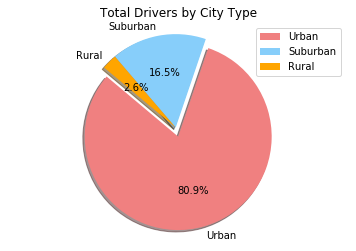

In [19]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

# Show Figure

Total_Drivers=scatter_df["Total Number of Drivers Per City"].sum()


Urban_Total_Drivers=Urban_df["Total Number of Drivers Per City"].sum()
Suburban_Total_Drivers=Suburban_df["Total Number of Drivers Per City"].sum()
Rural_Total_Drivers=Rural_df["Total Number of Drivers Per City"].sum()

Dpercent_urban=(Urban_Total_Drivers/Total_Drivers)*100
Dpercent_suburban=(Suburban_Total_Drivers/Total_Drivers)*100
Dpercent_rural=(Rural_Total_Drivers/Total_Drivers)*100


percent_fares={"Total Urban Driver Percent":Dpercent_urban,
              "Total Suburban Driver Percent": Dpercent_suburban,
              "Total Rural Driver Percent": Dpercent_rural}



labels = ["Urban", "Suburban", "Rural"]


sizes = [Dpercent_urban, Dpercent_suburban, Dpercent_rural]


colors = ["lightcoral", "lightskyblue", "orange"]

explode = (0.1, 0.0, 0.0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

plt.title("Total Drivers by City Type")
plt.legend(loc=0)

plt.savefig("data/ali-pie-chart-for-total-driver-per-city.png")


plt.show()